# 2. Advanced Tutorials - 1. Customization - 4. Custom training_basics

### 목차
1. Setup
2. Variables
3. Example:Fitting a linear model
 - 3-1 Define the model
 - 3-2 Define a loss function
 - 3-3 Obtain training data
 - 3-4 Define a training loop
 
URL : https://www.tensorflow.org/beta/tutorials/eager/custom_training

# 1. Setup

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

print(tf.__version__)

2.0.0-alpha0


# 2. Variables

In [2]:
x = tf.zeros((10,10))

x += 2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [3]:
v = tf.Variable(1.)
assert v.numpy() == 1.

v.assign(3.)
assert v.numpy() == 3.

v.assign(tf.square(v))
assert v.numpy() == 9.

# 3. Example:Fitting a linear model

1. Define the model.
2. Define a loss function.
3. Obtain training data.
4. Run through the training data and use an "optimizer" to adjust the variables to fit the data.

# 3-1 Define the model

In [4]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.)
        self.b = tf.Variable(0.)
        
    def __call__(self, x):
        return self.W *x + self.b

model = Model()

assert model(3.).numpy() == 15.

# 3-2 Define a loss function

In [5]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

# 3-3 Obtain training data

In [6]:
TRUE_W = 3.
TRUE_b = 2.
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

Current loss:
tf.Tensor(8.966815, shape=(), dtype=float32)


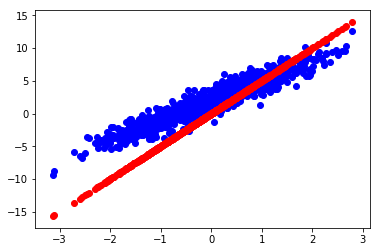

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show

print('Current loss:'),
print(loss(model(inputs), outputs))

# 3-4 Define a training loop

In [8]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

range(0, 10)
Epoch  0: W=5.00 b=0.00, loss=8.96681
Epoch  1: W=4.61 b=0.40, loss=6.14044
Epoch  2: W=4.29 b=0.72, loss=4.32315
Epoch  3: W=4.04 b=0.98, loss=3.15468
Epoch  4: W=3.84 b=1.18, loss=2.40338
Epoch  5: W=3.68 b=1.35, loss=1.92031
Epoch  6: W=3.55 b=1.48, loss=1.60971
Epoch  7: W=3.44 b=1.59, loss=1.41000
Epoch  8: W=3.36 b=1.67, loss=1.28159
Epoch  9: W=3.29 b=1.74, loss=1.19903


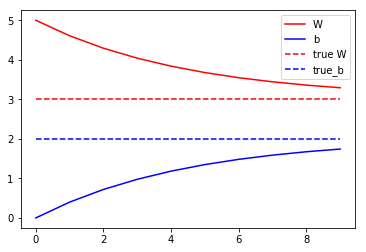

In [9]:
model = Model()

Ws, bs = [], []
epochs = range(10)
print(epochs)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))
    
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()